# The Robert and Rosenbaum Uncertainty Zones model

# An application to USDCAD FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import cme_processing as cme

## File paths and initial values

In [5]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
#URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [6]:
CURR = 'CAD'

In [7]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
#PATH_PRIOR = URL_ROOT+URL_EUR_1
#PATH_AFTER = URL_ROOT+URL_EUR_2

In [8]:
TRADING_HOURS = 9

In [9]:
TICK_PRIOR = 0.5
TICK_AFTER = 0.25

In [10]:
PRIOR_CDATES_LIST = [['6CH6', '010416'],
 ['6CH6', '010516'],
 ['6CH6', '010616'],
 ['6CH6', '010716'],
 ['6CH6', '010816'],
 ['6CH6', '011116'],
 ['6CH6', '011216'],
 ['6CH6', '011316'],
 ['6CH6', '011416'],
 ['6CH6', '011516'],
 ['6CH6', '011816'],
 ['6CH6', '011916'],
 ['6CH6', '012016'],
 ['6CH6', '012116'],
 ['6CH6', '012216'],
 ['6CH6', '012516'],
 ['6CH6', '012616'],
 ['6CH6', '012716'],
 ['6CH6', '012816'],
 ['6CH6', '012916'],
 ['6CH6', '20160201'],
 ['6CH6', '20160202'],
 ['6CH6', '20160203'],
 ['6CH6', '20160204'],
 ['6CH6', '20160205'],
 ['6CH6', '20160208'],
 ['6CH6', '20160209'],
 ['6CH6', '20160210'],
 ['6CH6', '20160211'],
 ['6CH6', '20160212'],
 ['6CH6', '20160215'],
 ['6CH6', '20160216'],
 ['6CH6', '20160217'],
 ['6CH6', '20160218'],
 ['6CH6', '20160219'],
 ['6CH6', '20160222'],
 ['6CH6', '20160223'],
 ['6CH6', '20160224'],
 ['6CH6', '20160225'],
 ['6CH6', '20160226'],
 ['6CH6', '20160229'],
 ['6CH6', '20160301'],
 ['6CH6', '20160302'],
 ['6CH6', '20160303'],
 ['6CH6', '20160304'],
 ['6CH6', '20160307'],
 ['6CH6', '20160308'],
 ['6CH6', '20160309'],
 ['6CH6', '20160310'],
 ['6CH6', '20160311'],
 ['6CM6', '20160314'],
 ['6CM6', '20160315'],
 ['6CM6', '20160316'],
 ['6CM6', '20160317'],
 ['6CM6', '20160318'],
 ['6CM6', '20160321'],
 ['6CM6', '20160322'],
 ['6CM6', '20160323'],
 ['6CM6', '20160324'],
 ['6CM6', '20160328'],
 ['6CM6', '20160329'],
 ['6CM6', '20160330'],
 ['6CM6', '20160331'],
 ['6CM6', '20160401'],
 ['6CM6', '20160404'],
 ['6CM6', '20160405'],
 ['6CM6', '20160406'],
 ['6CM6', '20160407'],
 ['6CM6', '20160408'],
 ['6CM6', '20160411'],
 ['6CM6', '20160412'],
 ['6CM6', '20160413'],
 ['6CM6', '20160414'],
 ['6CM6', '20160415'],
 ['6CM6', '20160418'],
 ['6CM6', '20160419'],
 ['6CM6', '20160420'],
 ['6CM6', '20160421'],
 ['6CM6', '20160422'],
 ['6CM6', '20160425'],
 ['6CM6', '20160426'],
 ['6CM6', '20160427'],
 ['6CM6', '20160428'],
 ['6CM6', '20160429'],
 ['6CM6', '20160502'],
 ['6CM6', '20160503'],
 ['6CM6', '20160504'],
 ['6CM6', '20160505'],
 ['6CM6', '20160506'],
 ['6CM6', '20160509'],
 ['6CM6', '20160510'],
 ['6CM6', '20160511'],
 ['6CM6', '20160512'],
 ['6CM6', '20160513'],
 ['6CM6', '20160516'],
 ['6CM6', '20160517'],
 ['6CM6', '20160518'],
 ['6CM6', '20160519'],
 ['6CM6', '20160520'],
 ['6CM6', '20160523'],
 ['6CM6', '20160524'],
 ['6CM6', '20160525'],
 ['6CM6', '20160526'],
 ['6CM6', '20160527'],
 ['6CM6', '20160530'],
 ['6CM6', '20160531'],
 ['6CM6', '20160601'],
 ['6CM6', '20160602'],
 ['6CM6', '20160603'],
 ['6CM6', '20160606'],
 ['6CM6', '20160607'],
 ['6CM6', '20160608'],
 ['6CM6', '20160609'],
 ['6CU6', '061016'],
 ['6CU6', '061316'],
 ['6CU6', '061416'],
 ['6CU6', '061516'],
 ['6CU6', '061616'],
 ['6CU6', '061716'],
 ['6CU6', '062016'],
 ['6CU6', '062116'],
 ['6CU6', '062216'],
 ['6CU6', '062316'],
 ['6CU6', '062416'],
 ['6CU6', '062716'],
 ['6CU6', '062816'],
 ['6CU6', '062916'],
 ['6CU6', '063016'],
 ['6CU6', '070116'],
 ['6CU6', '070416'],
 ['6CU6', '070516'],
 ['6CU6', '070616'],
 ['6CU6', '070716'],
 ['6CU6', '070816']]

In [11]:
AFTER_CDATES_LIST = [['6CU6', '071116'],
 ['6CU6', '071216'],
 ['6CU6', '071316'],
 ['6CU6', '071416'],
 ['6CU6', '071516'],
 ['6CU6', '071816'],
 ['6CU6', '071916'],
 ['6CU6', '072016'],
 ['6CU6', '072116'],
 ['6CU6', '072216'],
 ['6CU6', '072516'],
 ['6CU6', '072616'],
 ['6CU6', '072716'],
 ['6CU6', '072816'],
 ['6CU6', '072916'],
 ['6CU6', '080116'],
 ['6CU6', '080216'],
 ['6CU6', '080316'],
 ['6CU6', '080416'],
 ['6CU6', '080516'],
 ['6CU6', '080816'],
 ['6CU6', '080916'],
 ['6CU6', '081016'],
 ['6CU6', '081116'],
 ['6CU6', '081216'],
 ['6CU6', '081516'],
 ['6CU6', '081616'],
 ['6CU6', '081716'],
 ['6CU6', '081816'],
 ['6CU6', '081916'],
 ['6CU6', '082216'],
 ['6CU6', '082316'],
 ['6CU6', '082416'],
 ['6CU6', '082516'],
 ['6CU6', '082616'],
 ['6CU6', '082916'],
 ['6CU6', '083016'],
 ['6CU6', '083116'],
 ['6CU6', '090116'],
 ['6CU6', '090216'],
 ['6CU6', '090516'],
 ['6CU6', '090616'],
 ['6CU6', '090716'],
 ['6CU6', '090816'],
 ['6CU6', '090916'],
 ['6CU6', '091216'],
 ['6CU6', '091316'],
 ['6CU6', '091416'],
 ['6CU6', '091516'],
 ['6CZ6', '20160916'],
 ['6CZ6', '20160919'],
 ['6CZ6', '20160920'],
 ['6CZ6', '20160921'],
 ['6CZ6', '20160922'],
 ['6CZ6', '20160923'],
 ['6CZ6', '20160926'],
 ['6CZ6', '20160927'],
 ['6CZ6', '20160928'],
 ['6CZ6', '20160929'],
 ['6CZ6', '20160930'],
 ['6CZ6', '20161003'],
 ['6CZ6', '20161004'],
 ['6CZ6', '20161005'],
 ['6CZ6', '20161006'],
 ['6CZ6', '20161007'],
 ['6CZ6', '20161010'],
 ['6CZ6', '20161011'],
 ['6CZ6', '20161012'],
 ['6CZ6', '20161013'],
 ['6CZ6', '20161014'],
 ['6CZ6', '20161017'],
 ['6CZ6', '20161018'],
 ['6CZ6', '20161019'],
 ['6CZ6', '20161020'],
 ['6CZ6', '20161021'],
 ['6CZ6', '20161024'],
 ['6CZ6', '20161025'],
 ['6CZ6', '20161026'],
 ['6CZ6', '20161027'],
 ['6CZ6', '20161028'],
 ['6CZ6', '20161031'],
 ['6CZ6', '20161101'],
 ['6CZ6', '20161102'],
 ['6CZ6', '20161103'],
 ['6CZ6', '20161104'],
 ['6CZ6', '20161107'],
 ['6CZ6', '20161108'],
 ['6CZ6', '20161109'],
 ['6CZ6', '20161110'],
 ['6CZ6', '20161111'],
 ['6CZ6', '20161114'],
 ['6CZ6', '20161115'],
 ['6CZ6', '20161116'],
 ['6CZ6', '20161117'],
 ['6CZ6', '20161118'],
 ['6CZ6', '20161121'],
 ['6CZ6', '20161122'],
 ['6CZ6', '20161123'],
 ['6CZ6', '20161124'],
 ['6CZ6', '20161125'],
 ['6CZ6', '20161128'],
 ['6CZ6', '20161129'],
 ['6CZ6', '20161130'],
 ['6CZ6', '20161201'],
 ['6CZ6', '20161202'],
 ['6CZ6', '20161205'],
 ['6CZ6', '20161206'],
 ['6CZ6', '20161207'],
 ['6CZ6', '20161208'],
 ['6CZ6', '20161209'],
 ['6CZ6', '20161212'],
 ['6CZ6', '20161213'],
 ['6CZ6', '20161214'],
 ['6CZ6', '20161215'],
 ['6CZ6', '20161216'],
 ['w6CH7', '20161219'],
 ['w6CH7', '20161220'],
 ['w6CH7', '20161221'],
 ['w6CH7', '20161222'],
 ['w6CH7', '20161223'],
 ['w6CH7', '20161227'],
 ['w6CH7', '20161228'],
 ['w6CH7', '20161229'],
 ['w6CH7', '20161230'],
 ['x6CH7', '010317'],
 ['x6CH7', '010417'],
 ['x6CH7', '010517'],
 ['x6CH7', '010617'],
 ['x6CH7', '010917'],
 ['x6CH7', '011017'],
 ['x6CH7', '011117'],
 ['x6CH7', '011217'],
 ['x6CH7', '011317'],
 ['x6CH7', '011617'],
 ['x6CH7', '011717'],
 ['x6CH7', '011817'],
 ['x6CH7', '011917'],
 ['x6CH7', '012017'],
 ['x6CH7', '012317'],
 ['x6CH7', '012417'],
 ['x6CH7', '012517'],
 ['x6CH7', '012617'],
 ['x6CH7', '012717'],
 ['x6CH7', '013017']]

### Processing files

#### Prior

In [12]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [13]:
#PRIOR_CDATES_LIST

In [14]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [15]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [16]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [17]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [18]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [19]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [20]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [21]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [22]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [23]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [24]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [25]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [26]:
#AFTER_CDATES_LIST

In [27]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [28]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [29]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [30]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [31]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [32]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [33]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [34]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [35]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [36]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [37]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [38]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [39]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [40]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [41]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

### Tables

In [42]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [43]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.50,1.01840,2049.08545,1915.29851,12128.66418,41609.34328,0.33790,0.98446,0.98337,1.62319,18.94436,16.63345,0.00486,7537.57905
after,0.25,0.53197,4471.15111,3581.78472,13319.43056,37109.90972,0.38641,0.91388,0.94348,3.34441,9.13433,9.19457,0.00376,7577.53143


In [44]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.02201,811.31668,647.89972,3985.46579,14404.63117,0.03720,0.00803,0.01742,0.52170,12.98032,6.52924,0.00107,292.67519
after,0.0,0.02670,2276.68150,1388.94385,4902.63495,12453.05996,0.04258,0.05486,0.03733,1.57452,5.64380,4.03370,0.00090,103.91865


In [45]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.02,1.21,0.24,0.06,0.00,1.54
Imbal_Bid,0.63,26.56,1.69,0.19,0.27,29.34
Neutral,0.61,1.32,34.71,1.32,0.62,38.58
Imbal_Ask,0.27,0.19,1.68,26.23,0.63,29.00
Trade_Ask,0.00,0.06,0.25,1.20,0.03,1.54
Total Rows,1.54,29.34,38.58,29.00,1.54,100.00


In [46]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.04,1.16,0.48,0.13,0.00,1.82
Imbal_Bid,0.58,22.67,2.62,0.87,0.54,27.28
Neutral,0.66,2.45,35.91,2.45,0.66,42.13
Imbal_Ask,0.54,0.86,2.63,22.34,0.58,26.95
Trade_Ask,0.00,0.13,0.49,1.16,0.04,1.82
Total Rows,1.82,27.28,42.13,26.95,1.82,100.00


In [47]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.01  0.01  0.06  22.36  0.01   0.00  0.97  0.81      24.24
 D T         0.01  0.04  0.33  17.64  0.01   0.01  1.92  3.93      23.87
D T+F        0.01  0.01  0.11   2.60  0.01   0.01  0.44  0.64       3.83
  F         16.85  9.62  0.00   0.04  7.33  14.18  0.00  0.05      48.06
Total Rows  16.88  9.68  0.50  42.63  7.36  14.20  3.33  5.43     100.00

In [48]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                     Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F    F             
 D C         0.04  0.06  0.10  22.73  0.08   0.04  0.48   3.10      26.62
 D T         0.06  0.20  0.30  13.84  0.12   0.11  1.50   6.06      22.19
D T+F        0.04  0.05  0.11   1.40  0.07   0.05  0.17   0.76       2.67
  F         19.77  9.38  0.01   0.25  6.42  12.30  0.00   0.38      48.52
Total Rows  19.92  9.69  0.51  38.23  6.70  12.50  2.16  10.30     100.00

## Charts and Regressions

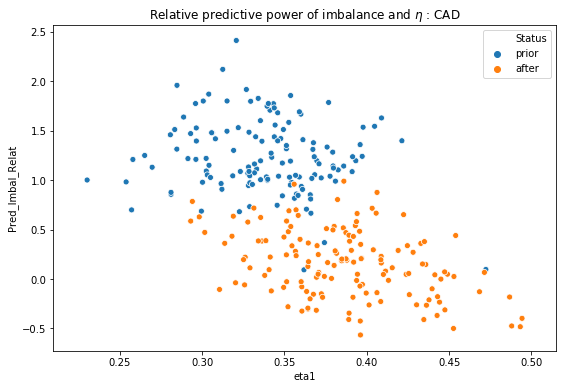

In [49]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

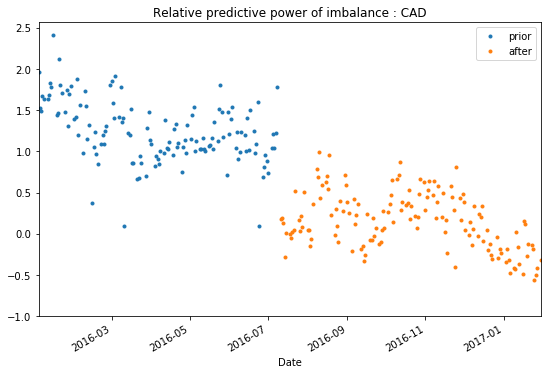

In [50]:
cme.time_series_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1)

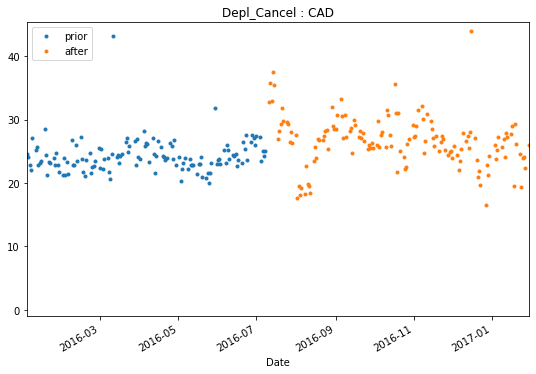

In [51]:
cme.time_series_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, -1)

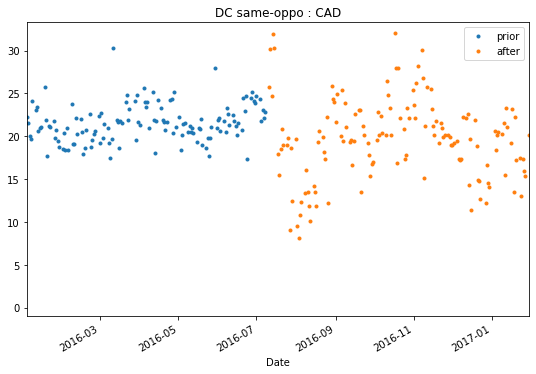

In [52]:
cme.time_series_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, -1)

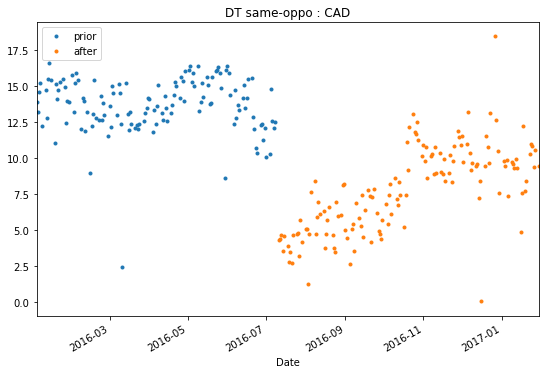

In [53]:
cme.time_series_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -1)

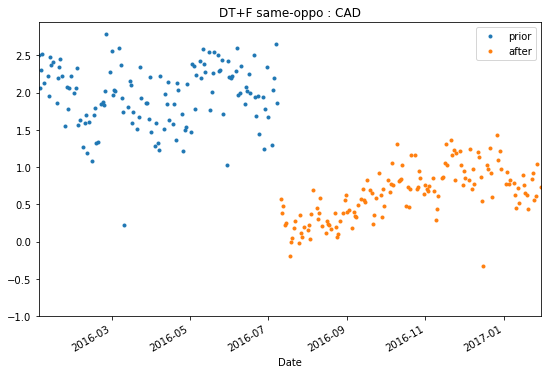

In [54]:
cme.time_series_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -1)

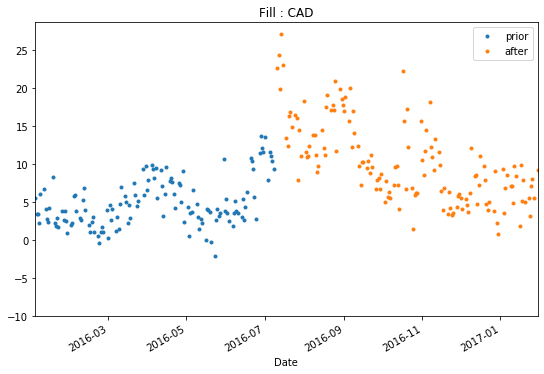

In [55]:
cme.time_series_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Fill : '+CURR, -10)

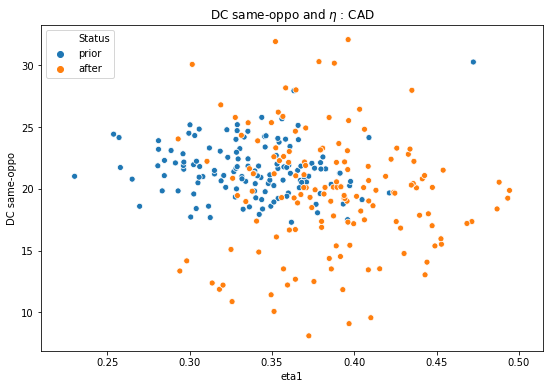

In [56]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

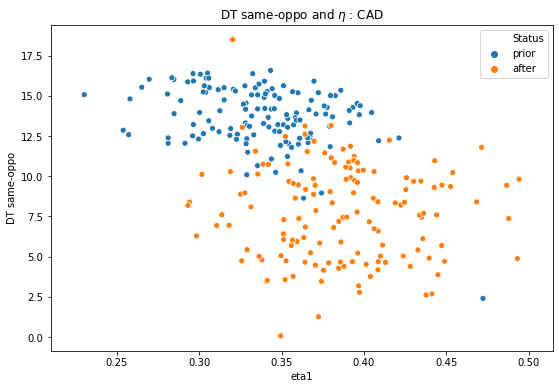

In [57]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

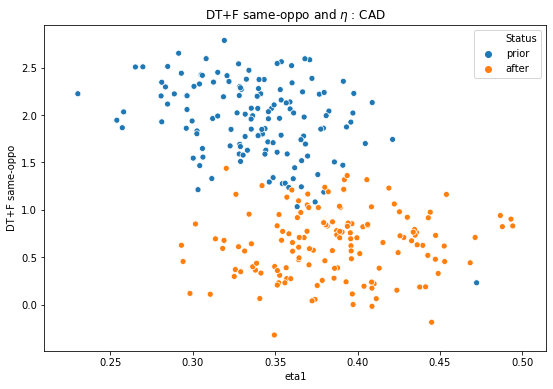

In [58]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

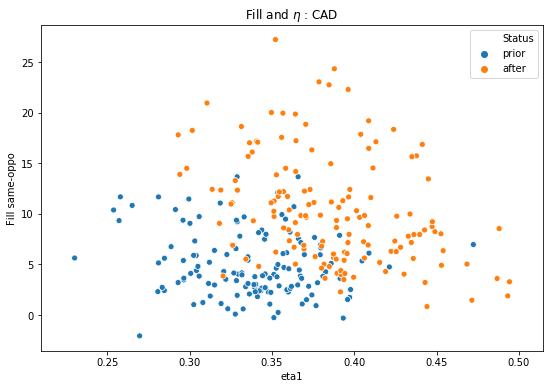

In [59]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

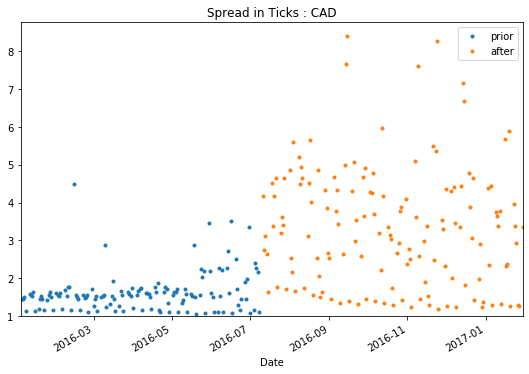

In [60]:
cme.time_series_plot(OB_UZ_STATS, 'twspr1', 'Spread in Ticks : '+CURR, 1)

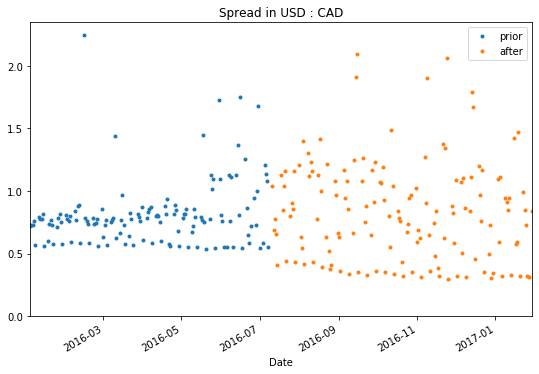

In [61]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

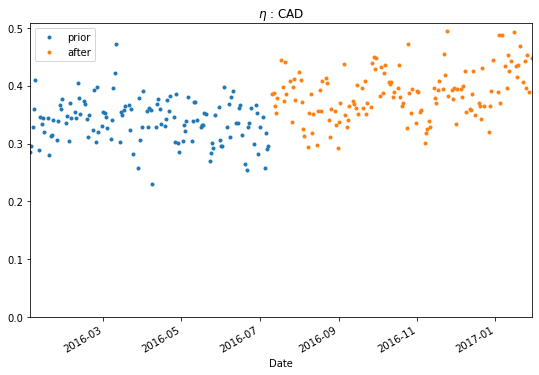

In [62]:
cme.time_series_plot(OB_UZ_STATS, 'eta1', '$\eta$ : '+CURR)

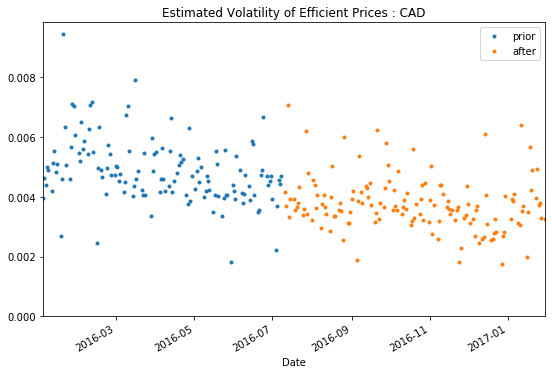

In [63]:
cme.time_series_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR)

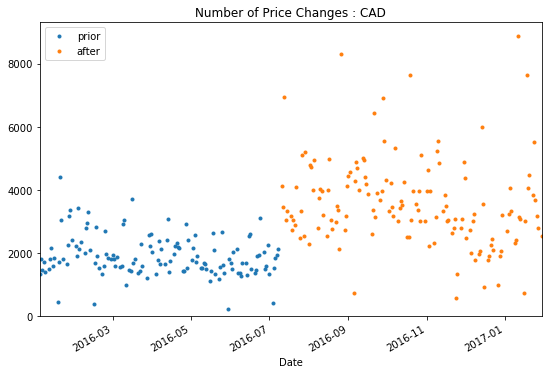

In [64]:
cme.time_series_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR)

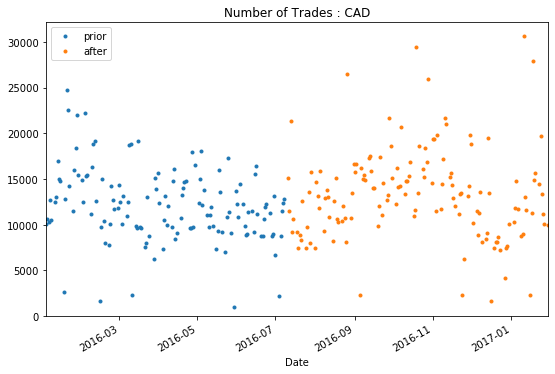

In [65]:
cme.time_series_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR)

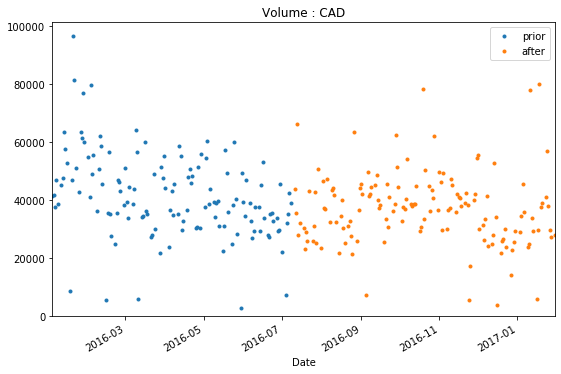

In [66]:
cme.time_series_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR)

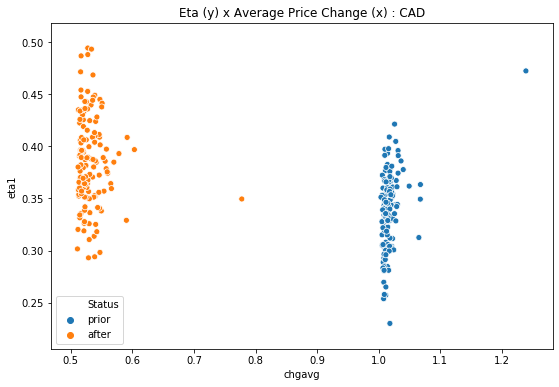

In [67]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

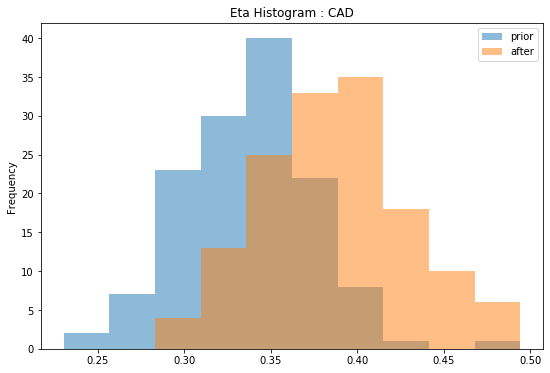

In [68]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

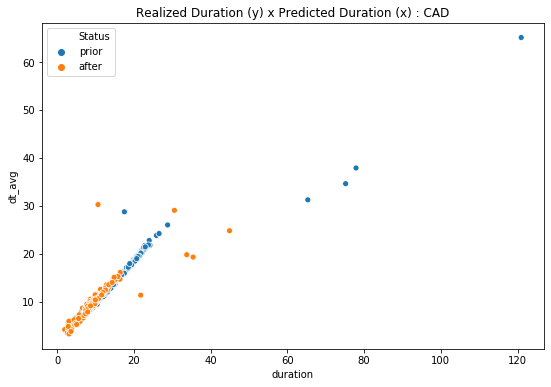

In [69]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

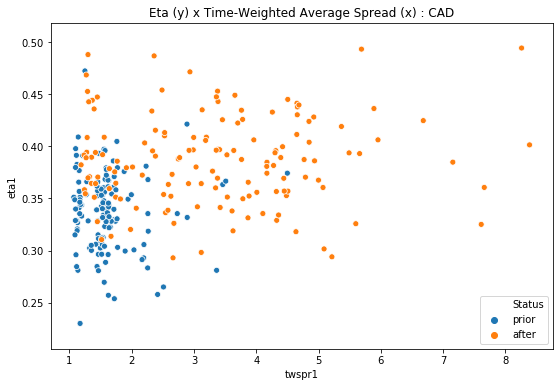

In [70]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

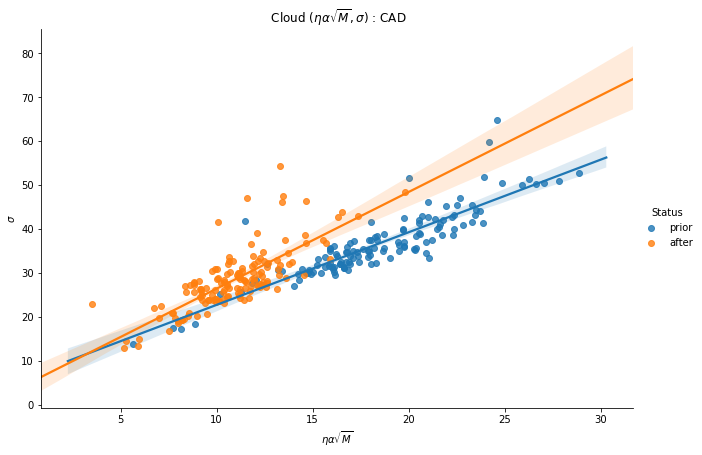

In [71]:
cme.cloud1(OB_UZ_STATS, CURR)

In [72]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           9.24e-44
Time:                        14:48:40   Log-Likelihood:                -360.28
No. Observations:                 134   AIC:                             726.6
Df Residuals:                     131   BIC:                             735.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.8507      1.47

/Users/marcoscscarreira/anaconda3/envs/CondaEnv36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  134
Model:                            RLM   Df Residuals:                      131
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:40                                         
No. Iterations:                    11                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.0420      1.01

In [74]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           3.38e-29
Time:                        14:48:40   Log-Likelihood:                -415.24
No. Observations:                 144   AIC:                             836.5
Df Residuals:                     141   BIC:                             845.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6828      1.73

In [75]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  144
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:40                                         
No. Iterations:                    12                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.8797      1.31

In [76]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

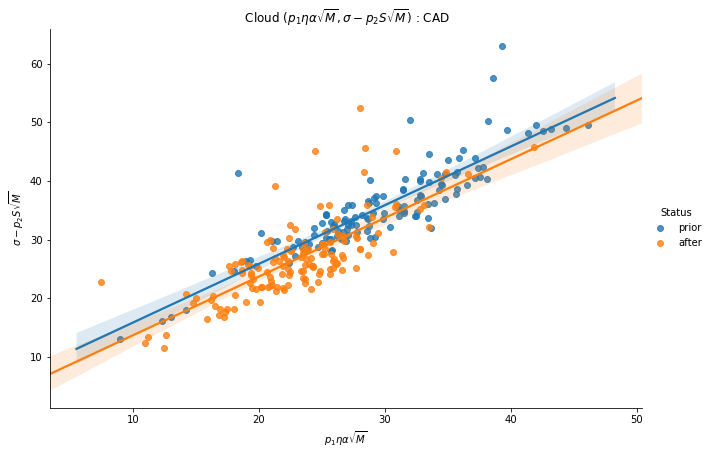

In [77]:
cme.cloud2(OB_UZ_STATS, CURR)

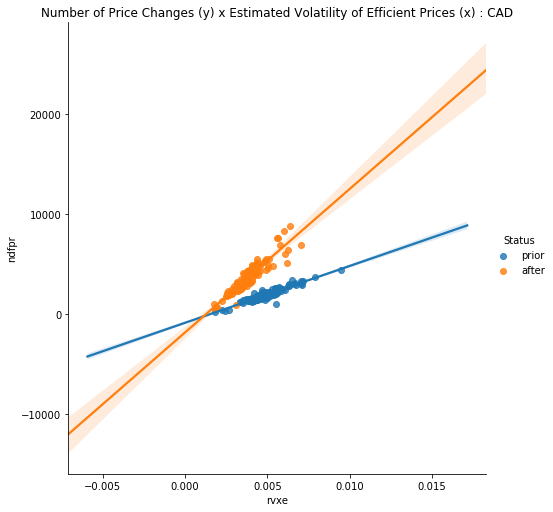

In [78]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [79]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     782.1
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           2.54e-57
Time:                        14:48:41   Log-Likelihood:                 63.014
No. Observations:                 134   AIC:                            -122.0
Df Residuals:                     132   BIC:                            -116.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2584      0.314     51.820      0.0

In [80]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:41                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4796      0.224     69.063      0.0

In [81]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     842.1
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           1.46e-61
Time:                        14:48:41   Log-Likelihood:                 57.938
No. Observations:                 144   AIC:                            -111.9
Df Residuals:                     142   BIC:                            -105.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5177      0.325     53.951      0.0

In [82]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:41                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1838      0.259     66.381      0.0

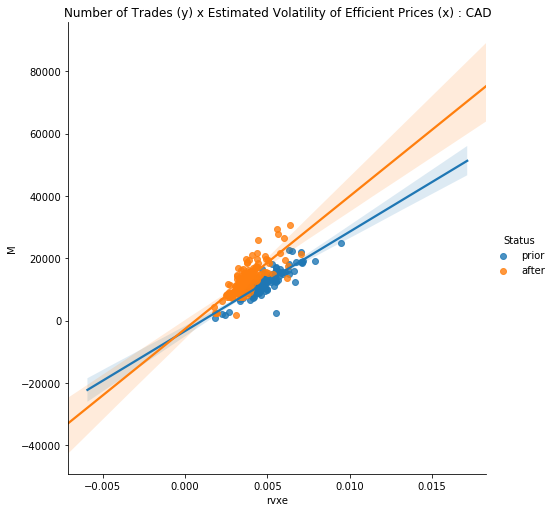

In [83]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [84]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     284.7
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           9.31e-35
Time:                        14:48:42   Log-Likelihood:                -5.2812
No. Observations:                 134   AIC:                             14.56
Df Residuals:                     132   BIC:                             20.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1345      0.522     34.720      0.0

In [85]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:42                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8491      0.330     50.988      0.0

In [86]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           9.15e-31
Time:                        14:48:42   Log-Likelihood:                -18.192
No. Observations:                 144   AIC:                             40.38
Df Residuals:                     142   BIC:                             46.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6061      0.551     31.958      0.0

In [87]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:42                                         
No. Iterations:                    20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9827      0.413     41.075      0.0

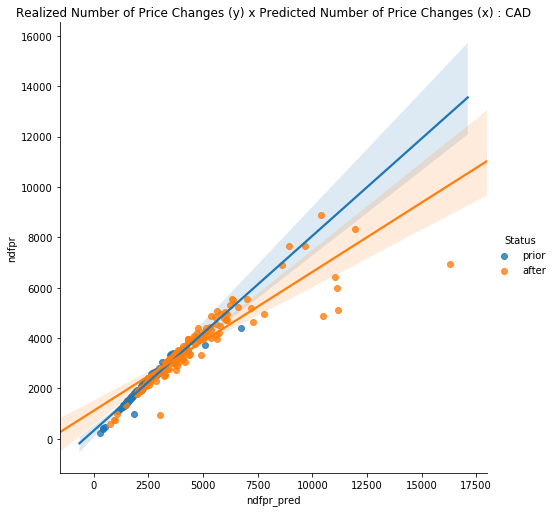

In [88]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

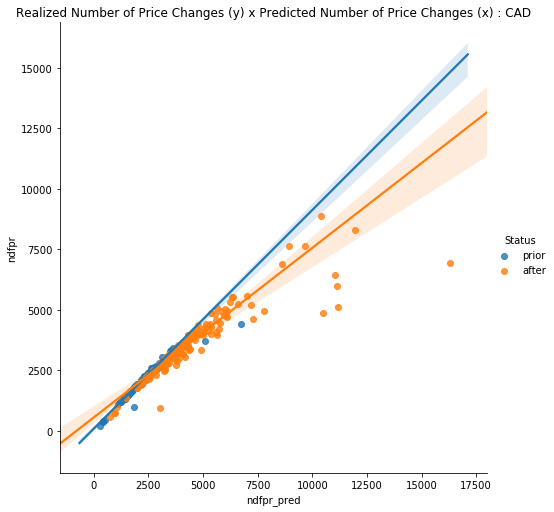

In [131]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

In [89]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1938.
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           9.19e-81
Time:                        14:48:43   Log-Likelihood:                -872.71
No. Observations:                 134   AIC:                             1749.
Df Residuals:                     132   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.9856     38.666      8.586      0.0

In [90]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:43                                         
No. Iterations:                    28                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.3816     10.534      9.149      0.0

In [91]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     624.3
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           7.78e-54
Time:                        14:48:43   Log-Likelihood:                -1124.5
No. Observations:                 144   AIC:                             2253.
Df Residuals:                     142   BIC:                             2259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1119.7400    110.501     10.133      0.0

In [92]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:43                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        561.2769     51.779     10.840      0.0

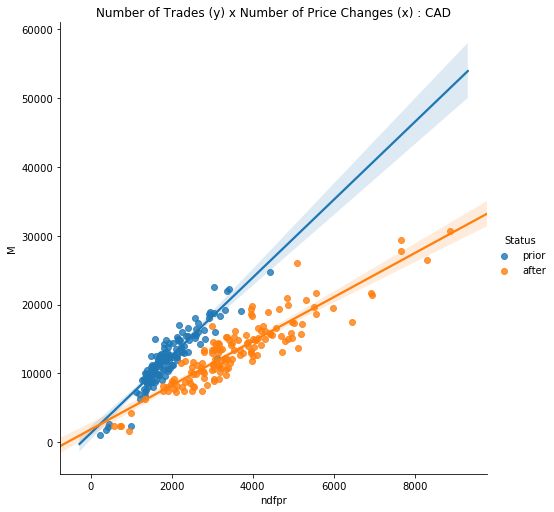

In [93]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

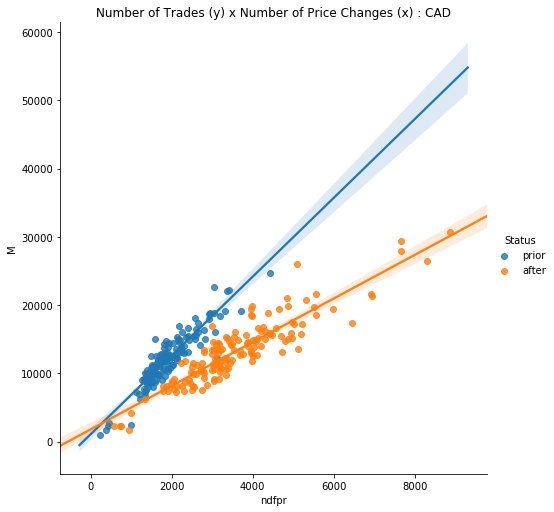

In [132]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [94]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     722.9
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           2.13e-55
Time:                        14:48:44   Log-Likelihood:                -1175.4
No. Observations:                 134   AIC:                             2355.
Df Residuals:                     132   BIC:                             2361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1294.6792    425.222      3.045      0.0

In [95]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:44                                         
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1089.5304    386.369      2.820      0.0

In [96]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     669.5
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           1.32e-55
Time:                        14:48:44   Log-Likelihood:                -1302.0
No. Observations:                 144   AIC:                             2608.
Df Residuals:                     142   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1835.9584    475.809      3.859      0.0

In [97]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:44                                         
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1796.6915    451.558      3.979      0.0

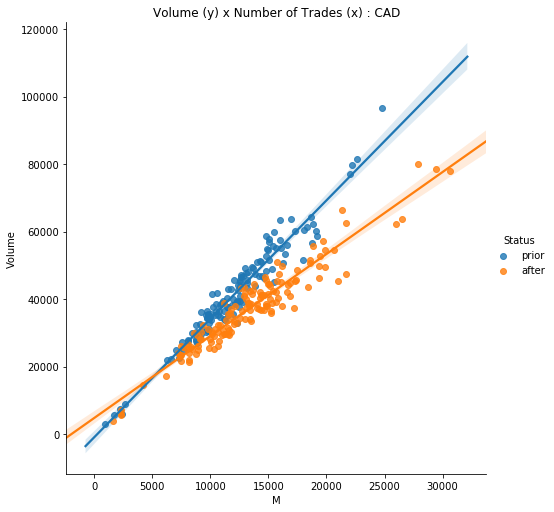

In [98]:
cme.regr_plot(OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

In [99]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2176.
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           6.87e-84
Time:                        14:48:44   Log-Likelihood:                -1281.0
No. Observations:                 134   AIC:                             2566.
Df Residuals:                     132   BIC:                             2572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -955.1967    960.107     -0.995      0.3

In [100]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:44                                         
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -956.0126    892.898     -1.071      0.2

In [101]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1522.
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           9.08e-78
Time:                        14:48:44   Log-Likelihood:                -1384.5
No. Observations:                 144   AIC:                             2773.
Df Residuals:                     142   BIC:                             2779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4753.4785    883.466      5.380      0.0

In [102]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  144
Model:                            RLM   Df Residuals:                      142
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:44                                         
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4451.1857    901.634      4.937      0.0

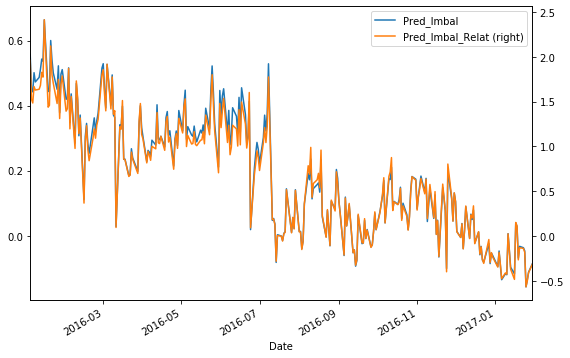

In [103]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'], figsize=(9,6));

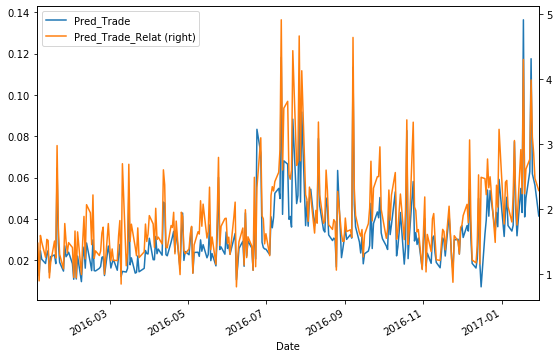

In [104]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [105]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

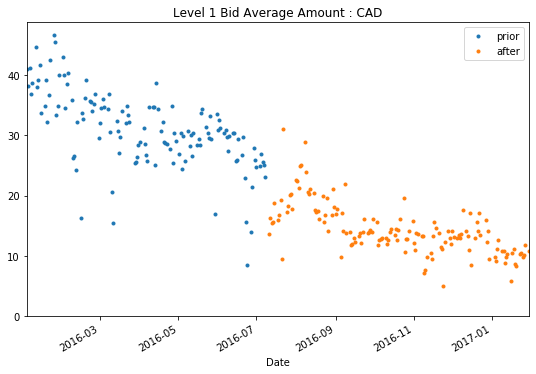

In [106]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR)

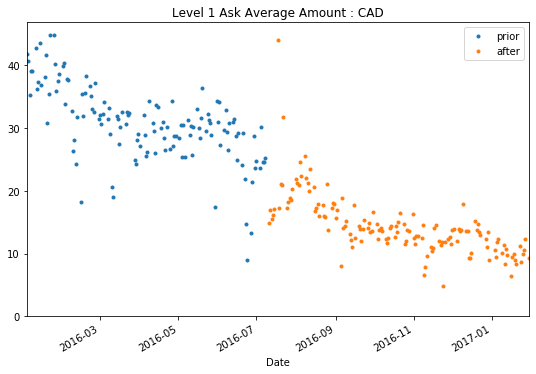

In [107]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR)

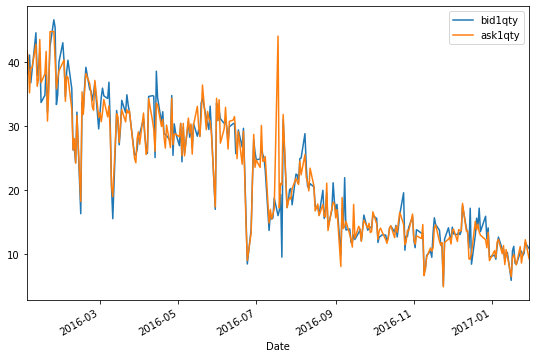

In [108]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [109]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    2.151387
ask1qty    2.135273
dtype: float64

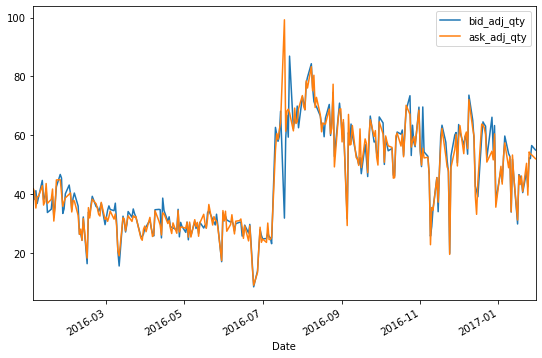

In [110]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6));

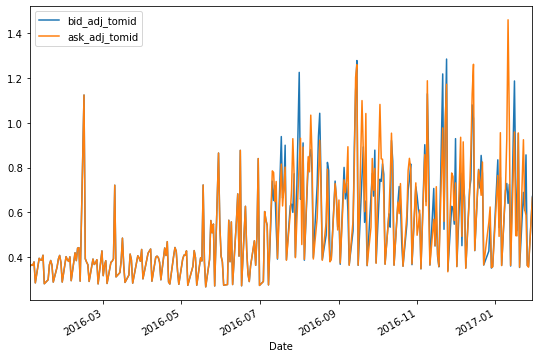

In [111]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6));

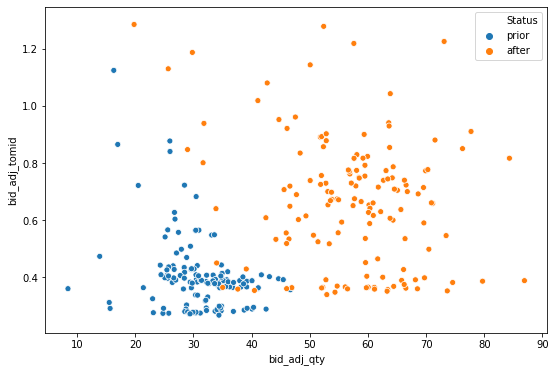

In [112]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

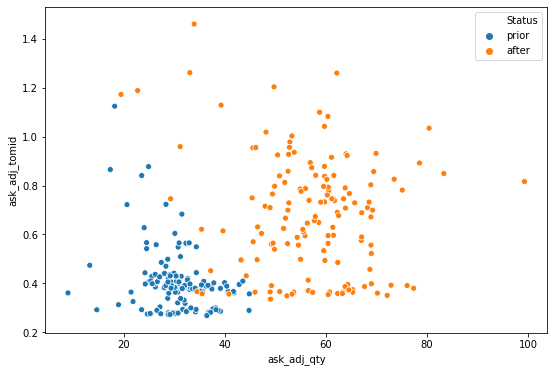

In [113]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [114]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 100)

In [115]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [116]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 100)

In [117]:
AFTER_MEAN_COST['Status'] = 'after'

In [118]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

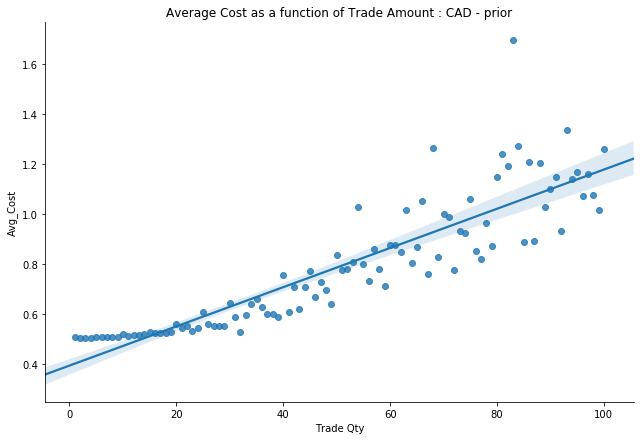

In [119]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [120]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           2.51e-15
Time:                        14:48:47   Log-Likelihood:                 87.930
No. Observations:                  50   AIC:                            -171.9
Df Residuals:                      48   BIC:                            -168.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4629      0.012     37.890      0.0

In [121]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:47                                         
No. Iterations:                    40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4711      0.010     45.795      0.0

In [122]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     364.5
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           8.60e-35
Time:                        14:48:47   Log-Likelihood:                 72.368
No. Observations:                 100   AIC:                            -140.7
Df Residuals:                      98   BIC:                            -135.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3956      0.024     16.563      0.0

In [123]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:47                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4056      0.019     20.894      0.0

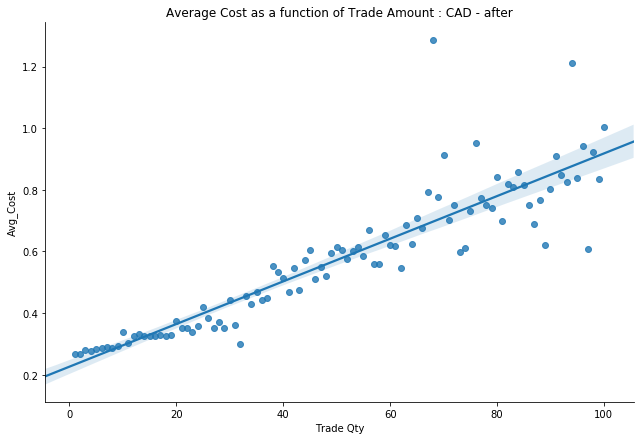

In [124]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [125]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     275.6
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           1.60e-21
Time:                        14:48:48   Log-Likelihood:                 91.149
No. Observations:                  50   AIC:                            -178.3
Df Residuals:                      48   BIC:                            -174.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2316      0.011     20.219      0.0

In [126]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:48                                         
No. Iterations:                    25                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2342      0.010     22.355      0.0

In [127]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     431.8
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           1.09e-37
Time:                        14:48:48   Log-Likelihood:                 93.369
No. Observations:                 100   AIC:                            -182.7
Df Residuals:                      98   BIC:                            -177.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2263      0.019     11.689      0.0

In [128]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 31 Aug 2019                                         
Time:                        14:48:48                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2280      0.011     21.501      0.0

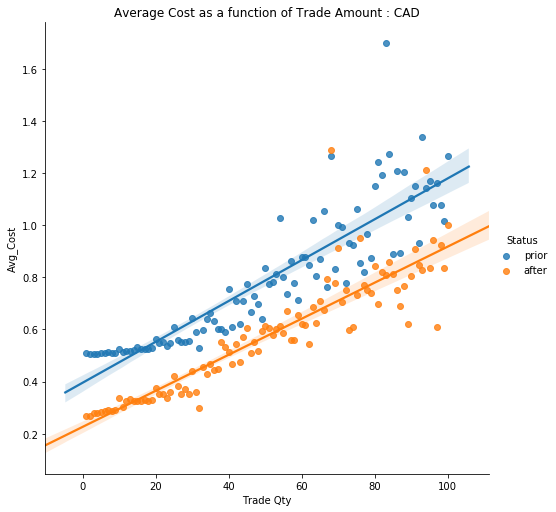

In [129]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

## Eta prediction

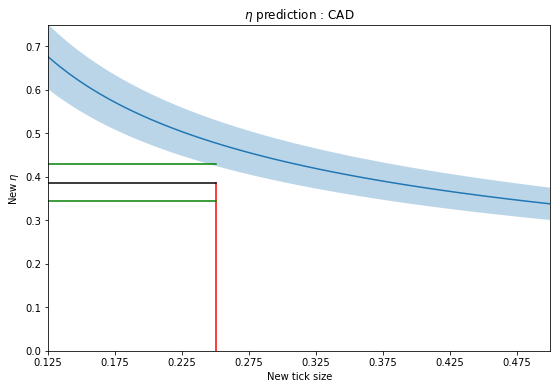

In [130]:
cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
    TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
    TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
    CURR)